### CS/ECE/ISyE 524 &mdash; Introduction to Optimization &mdash; Spring 2016 ###

# Optimizing the Best Possible NHL Expansion Team #

#### Peter Schlafly (schlafly@wisc.edu), Sam Olson (sjolson8@wisc.edu)
*****

### Table of Contents

1. [Introduction](#1.-Introduction)
1. [Mathematical Model](#2.-Mathematical-model)
1. [Solution](#3.-Solution)
1. [Results and Discussion](#4.-Results-and-discussion)
  1. [Optional Subsection](#4.A.-Feel-free-to-add-subsections)
1. [Conclusion](#5.-Conclusion)

## 1. Introduction ##



This project addresses the situation of an expansion team in the NHL. If another team will be added to the league they must take players from the existing teams in order to be competitive. Not all players will be available though, because the existing teams get to select certain players on there team that cannot be taken. This project narrowed the focus to just the central division teams for simplicity,  so the program looks to determine who each of the central teams want to keep and then who the expansion team would take from the pool of remaining players. The project is relevant today because of recent talks in the NHL of adding a team in Las Vegas. There has been a new stadium built in Las Vegas with the intent to serve for an NHL team [(Sports Illustrated)](http://www.si.com/nhl/2016/04/06/nhl-expansion-team-las-vegas-new-arena) and NHL Commissioner Gary Bettman has stated the NHL will be undergoing research on an expansion this coming offseason [(Las Vegas Review)](http://www.reviewjournal.com/sports/hockey-vegas/foley-patiently-waits-puck-drop-las-vegas-nhl-franchise). The NHL is one of the 4 major professional sports leagues in the United states, with 3 teams valued at over a billion dollars and the lowest being just shy of 200 million dollars [(Forbes)](http://www.forbes.com/nhl-valuations/). The NHL also signed a record breaking TV deal in 2011 with NBC that gave them the broadcasting rights for 10 years and is worth approximately $2 billion [(NHL TV Deal)](https://www.nhl.com/news/nhl-nbc-sign-record-setting-10-year-tv-deal/c-560238). With teams worth so much and such significant investments in TV deals it is clear that NHL hockey is as much of a business as it is a game. The best way to increase interest and TV ratings is by having a competitive league, which is why making sure an expansion team is able to compete from the beginning is so important. In order to make sure an expansion team is competitive from the beginning they need to have the best possible players. This is why there are rules established on how they can choose their players and who is available to them. The model produced in this project mimics the concepts of the expansion rules. Some of these rules are how many of each position the existing teams can make unavailable for the draft and constraints on salary caps for both the existing and current teams. The Model portion of this report will go into further detail about these constraints and other defining features of the program. The data used to evaluate players in the model is taken from the EA Sports NHL ‘14 video game. This game rates player's skills such as skating, shooting, checking, and defense based on input from professional NHL scouts who are expert evaluators of players [(EA Sports)](https://www.easports.com/nhl/news/2014/nhl-15-player-ratings-top-50-overall).  The game also has proportional salaries for all players to make playing the “GM” mode as real as possible. We were able to find an excel document containing all the players and attributes online which we then edited to fit the code as well as possible. The model will be explained in further detail in the next section and is followed by the code itself. There are multiple different results listed based on sensitivity analysis in the Results and Discussion section and our choice for the best possible expansion team based on the extensive hockey knowledge of the group members. The Conclusion section contains a summary of the findings and how a program like this could be used in the potential future NHL expansion into Las Vegas along with an idea for similar program that NHL teams could use in the standard Annual draft. 





[flow]: https://s-media-cache-ak0.pinimg.com/736x/f5/75/c5/f575c53b93724808c6f0211890a54900.jpg

## 2. Mathematical model ##

The model is based on the real NHL so most of the assumptions made are directly from the NHL or are based on concepts from the NHL and adjusted for the sake of clarity in the model. NHL roster sizes contain 23 players on opening day but most teams have multiple players who rotate between the bottom few roster spots. In order to eliminate these players at the bottom we narrowed the existing teams rosters to 20 players each that they get to choose who they keep from and the remaining are available. We then made the assumption that the expansion team will get to select 18 players. This is based on the fact that it makes it possible to take an even number of players from each team and that it leaves roster spots open for the regular NHL draft and for free agents who are not signed to any team. The next assumption made was that the expansion team would have to pick 10 forwards, 6 defensemen and 2 goalies. This is based on the fact that all teams in the NHL typically carry at least this many of each position to maintain depth at each position. 

There are 2 decision variables in the model that are both binary and contain 120 values. There is a decision variable $p_i \in [1,2,\ldots 120]$ to determine whether each player is chosen to be kept by their existing team and the variable $x_i \in [1,2,\ldots 120]$ to determine which players the expansion team will draft. If $p_i = 1$ then that player is chosen to be kept by their team and if $x_i = 1$ then that player is drafted by the expansion team. 

There are multiple constraints in the program. They can be divided into two groups for better clarity. There are the constraints pertaining to how existing teams can choose who they keep and there are constraints pertaining to who the expansion team can draft. 

There first set of constraints pertaining to who can be kept make sure that each team can only keep 2 players. This is done by stating that $\Sigma(p_i*team_i) \ge 2*team_i i \in [1:20, 21:40 \ldots]$ . The teams are number 1 through 6 and because each team has 20 players this can be done in 6 simple constraints with i values in increments of 20. This constraint combined with the constraint $\Sigma p_i$ for $i \in [1,2,\ldots 120]$ ensures that each team will choose just 2 players that they are making unavailable. The other constraint for this part of the problem defines what types of players can be kept by each team. We wanted to ensure that no team kept 2 goalies or 2 forwards. They could choose to keep 2 defensemen but it is not as much of a concern as most of the highest rated players are of the other two positions. This constraint is $ 3 \le \Sigma (p_i*position_i) \le 5$ for each team. The positions are valued at 1, 2, and 3 for goalies, defensemen and forwards, respectively. So if a combination of 2 of those values is between 3 and 5 it cannot be 2 goalies or 2 forwards. 

The next set of constraints pertain to who the expansion team can draft. The team gets to draft 18 players so that is simply $\Sigma x_i = 18$ for $ \in [1,2,\ldots 120]$. There is also a constraint on how many players can be drafted from each exisitng team. To make sure each team loses the same amount of players all 6 central teams will lose 3 players. This constraint is $\Sigma(x_i*team_i) \ge 3*team_i i \in [1:20, 21:40 \ldots]$. It is formatted similarly to the constraint in the first part saying each team can only keep 2 players as it is in the form of 6 constraints for the sets of 20 players. The next constraints ensure the number of positions drafted by the team. We want 2 goalies, 6 defensemen and 10 forwards to be drafted for a balanced team. The constraint for 2 goalies is $\Sigma(x_i*position_i) = 2$ for $ i \in [goalies]$ where [goalies] is a predefined array holding the identification values for each of the 12 goalies in the data set. The goalie constraint comabined with $\Sigma(x_i*position_i) = 44 $ for $ i \in [1,2,\ldots 120]$ ensures that the desired number of each position is selected. This works because the position ID numbers can only add up to 44 in one way if it is guranteed that there are 2 goalies. The next constraint is for the salary cap to make sure the expansion team does not take too many players with too high of salaries. It can also be used for sensitivity analysis to see how highly rated a team can be based on the limit of a salary cap. The constraint for a cap of 29000 dollars is $\Sigma(x_i*Salary_i) \le 29000$ for $i \in [1,2,\ldots 120]$. 

The final, and most critical, constraint is a logic constraint that ensures a player cannot be both protected by his exisiting team and selected by the expansion team. This constraint is $p_i \le (1 - x_i)$ for $i \in [1,2,\ldots 120]$ . This make sures that if $p_i = 1$ then $x_i \ne 0$.


With all of the mentioned constraints in place and the proper decision variables we can now discuss the objective value. We want to create the best possible team while also acknowldiging that the exisiting teams are not going to want to lose their best players. With this in mind we form an objective function that maximizes the total sum of the attributes of the players kept and those drafted. In order to represent that the exisiting teams get to choose who is kept before the draft those players are weighted heavier in the objective, so the very best players will always be kept. This objective function is: 
\begin{aligned}
\Sigma(p_i*(.5x_i)*(overall_i+skate_i+shot_i+hands_i+checking_i+defense_i+weight_i))
\end{aligned}
The .5 in front of the $x_i$ variable makes sure that the players being kept are a priority because that happens before the draft. Also, there can be sensitivity analysis done based on how much we care about certain attributes, such as placing .05 in front of the "weight" attribute because we may not care as much about how much the player actually weighs. This is also important because the "weight" attribute is the only one that is not on a scale form 1-100 so it could potentially skew the data if not adjusted. 



$$
\begin{bmatrix} x \\ p \end{bmatrix} =
\begin{bmatrix} f \end{bmatrix}
$$
$$
\begin{bmatrix} overall \\ skate \\ shot \\ hands \\ checking \\ defense \\ weight \end{bmatrix} =
\begin{bmatrix} c \end{bmatrix}
$$

The model in standard form:

$$
\begin{aligned}
\underset{i \in \mathbb{R^n}}{\text{maximize}}\qquad& \Sigma(f_i*c_i) \\
\text{subject to:}\qquad& x_i \le 18 && i=1,\dots,120\\
& x_i \ge 18 && i=1,\dots,120\\
& p_i \le 12 && i=1,\dots,120\\
& p_i \ge 12 && i=1,\dots,120\\
& p_i*team_i \ge 2*team_i && i=1,\dots,120\\
& p_i*position_i \ge 3 && i=1,\dots,120\\
& p_i*position_i \le 5 && i=1,\dots,120\\
& x_i + p_i \le 1 && i=1,\dots,120\\
& x_i*team_i \le 3*team_i && i=1,\dots,120\\
& \Sigma(x_i*position_i) \ge 44 && i=1,\dots,120\\
& \Sigma(x_i*position_i) \le 44 && i=1,\dots,120\\
& \Sigma(x_i*salary_i) \le 29000 && i=1,\dots,120\\
\end{aligned}
$$

## 3. Solution ##

The following code is the solution for the model explained above. All of the constraints and variables are identified by brief explanations that reference the more detailed explanations in the model section. The code begins by calling in the data from the csv file and then using that data to find the desired objective. 

In [1]:
# Code accessing the nhl ratings csv with all of the players and their 
# respective attributes. 
raw = readdlm("nhl ratings.csv",',');
(m,n) = size(raw)

n_players = 2:m
n_attributes = 2:n

player = raw[n_players,1][:]
attribute = raw[1,n_attributes][:];

In [2]:
# defining reference arrays for each of the attributes so they can be used 
# to define each player
team = raw[n_players,2][:]
position = raw[n_players,3][:]
overall = raw[n_players,4][:]
skate = raw[n_players,5][:]
shot = raw[n_players,6][:]
hands = raw[n_players,7][:]
checking = raw[n_players,8][:]
defense = raw[n_players,9][:]
weight = raw[n_players,10][:]
hand = raw[n_players,11][:]
salary = raw[n_players,12];

In [3]:
###MODEL FOR PREDICTING WHICH PLAYERS WILL BE AVAILABLE FOR US TO CHOOSE
using JuMP
m3 = Model()

#players that are goalies (position is 1)
goalie = [7 18 28 38 42 60 65 69 82 100 107 116]

#decision variable for which players will be protected by their current team
@variable(m3, p[1:120], Bin)
#decision variable for which players that we select 
@variable(m3, x[1:120], Bin)

#constraint that says the total amount protected will be 12 (each team protects two players of their choice)
@constraint(m3, sum(p) == 12)

#constraint that says we only take 18 players (10 forwards, 6 defenseman, 2 goalies)
@constraint(m3, sum(x) == 18)

#each team must protext 2 players 

@constraint(m3, sum{p[i]*team[i], i in 1:20} >= 2) #blackhawks
@constraint(m3, sum{p[i]*team[i], i in 21:40} >= 4) #avalanche
@constraint(m3, sum{p[i]*team[i], i in 41:60} >= 6) #stars
@constraint(m3, sum{p[i]*team[i], i in 61:80} >= 8) #wild
@constraint(m3, sum{p[i]*team[i], i in 81:100} >= 10) #predators
@constraint(m3, sum{p[i]*team[i], i in 101:120} >= 12) #blues

#constraint that says a team cannot protect only 2 forwards or only 2 goalies
@constraint(m3, 3 <= sum{p[i]*position[i], i in 1:20} <= 5) #blackhawks 
@constraint(m3, 3 <= sum{p[i]*position[i], i in 21:40} <= 5) #avalanche
@constraint(m3, 3 <= sum{p[i]*position[i], i in 41:60} <= 5) #stars
@constraint(m3, 3 <= sum{p[i]*position[i], i in 61:80} <= 5) #wild
@constraint(m3, 3 <= sum{p[i]*position[i], i in 81:100} <= 5) #predators
@constraint(m3, 3 <= sum{p[i]*position[i], i in 101:120} <= 5) #blues

####################################################################################
#portion where take players are selected based on who is available

#constraint that says if a player was protected, they are no longer available
for i in 1:120
    @constraint(m3, x[i] <= (1-p[i]))
end

#cannot take more than 3 players from each team
@constraint(m3, sum{x[i]*team[i], i in 1:20} <= 3) #blackhawks 
@constraint(m3, sum{x[i]*team[i], i in 21:40} <= 6) #avalanche
@constraint(m3, sum{x[i]*team[i], i in 41:60} <= 9) #stars   
@constraint(m3, sum{x[i]*team[i], i in 61:80} <= 12) #wild
@constraint(m3, sum{x[i]*team[i], i in 81:100} <= 15) #predators
@constraint(m3, sum{x[i]*team[i], i in 101:120} <= 18) #blues

#constraint that says we need 2 goalies
@constraint(m3, sum{x[i]*position[i], i in goalie} == 2)

#constraint that says we need 6 defensemen and 10 forwards
@constraint(m3, sum{x[i]*position[i], i in 1:120} == 44)

#salary cap constraint
@constraint(m3, sum{x[i]*salary[i], i in 1:120} <= 29000)

#constraint that dictates that our average overall rating cannot exceed third quartile in our division (84%)
#implemented in the analysis portion
#@addConstraint(m3, sum{x[i]*overall[i], i in 1:120} <= 84*18 )

#objective function that prioritizes the protected players over the available players
@objective(m3, Max, sum{(p[i]+.5x[i])*(overall[i]+skate[i]+shot[i]+hands[i]+checking[i]+defense[i]
    +.025*weight[i]), i in 1:120})
solve(m3)

println("The players that get protected are:")
println()
println("Player","      ","Overall", " ", "Team"," ", "Position","  ","Shot"," ","  ","Hands","   ", "Salary")
for i in 1:120
    if getvalue(p[i]) == 1 
        println(player[i]," ",overall[i],"    ",team[i],"    ", position[i],"        ",shot[i],"    ",hands[i],"        " ,salary[i])
    end
end
println()
println("The players that we select are:")
println()
println("Player","      ","Overall", " ", "Team"," ", "Position","  ","Shot"," ","  ","Hands","   ", "Salary")
for i in 1:120
    if getvalue(x[i]) == 1
        println(player[i]," ",overall[i],"    ",team[i],"    ", position[i],"       ",shot[i],"     ",hands[i],"        " ,salary[i])
    end
end
println()
println("The total score for the team: ", getobjectivevalue(m3))

The players that get protected are:

Player      Overall Team Position  Shot   Hands   Salary
Toews, J.       92    1    3        87    91        1720
Crawford, C.    86    1    1        87    87        1630
Duchene, M.     87    2    3        87    88        1620
Johnson, E.     85    2    2        81    83        1510
Benn, J.        88    3    3        87    88        1650
Lehtonen. K     86    3    1        87    89        1660
Suter, R.       92    4    2        83    88        1650
Parise, Z.      90    4    3        87    91        1660
Weber, S.       92    5    2        85    85        1670
Rinne, P.       89    5    1        89    87        1750
Pietrangelo, A. 90    6    2        85    88        1670
Backes, D.      87    6    3        87    87        1650

The players that we select are:

Player      Overall Team Position  Shot   Hands   Salary
Keith, D.       91    1    2       84     91        1620
Seabrook, B.    89    1    2       82     84        1580
Hossa, M.       8

# 4. Results and discussion ##


Player           Overall Team Position  Shot   Hands   Salary
Keith, D.       91    1    2       84    91      1620
Seabrook, B.    89    1    2       82    84      1580
Hossa, M.       89    1    3       87    89      1660
Stastny, P.     86    2    3       85    88      1550
Landeskog, G.   85    2    3       86    86      1590
O'Reilly, R.    84    2    3       85    84      1540
Daley, T.       85    3    2       80    82      1470
Cole, E.        84    3    3       85    84      1520
Goligoski, A.   83    3    2       84    88      1490
Koivu, M.       87    4    3       86    88      1610
Pominville, J.  87    4    3       87    88      1570
Backstrom, N.   85    4    1       87    84      1600
Fisher, M.      84    5    3       84    84      1520
Legwand, D.     84    5    3       85    85      1540
Wilson, C.      84    5    3       86    85      1560
Bouwmeester, J. 86    6    2       82    86      1570
Shattenkirk, K. 86    6    2       83    87      1560
Halak, J.       85 

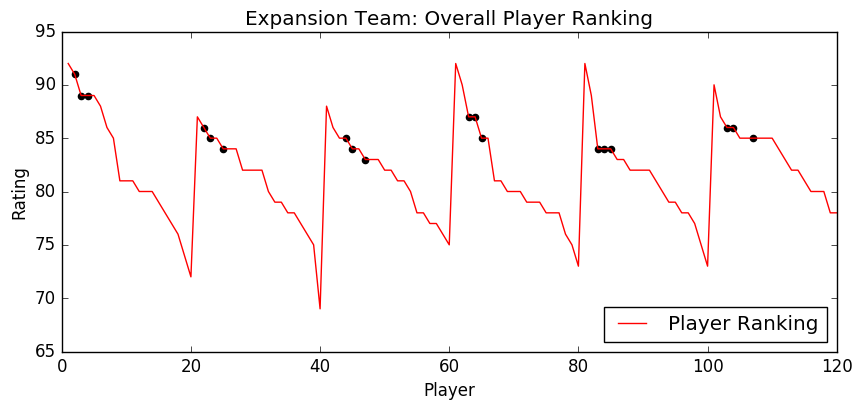

In [6]:
#PART A

using PyPlot
PyPlot.svg(true)

xx = 1:120
figure(figsize=(10,4))
plot(xx,overall,"-", color = "red");
scatter([xx[2],xx[3],xx[4],xx[22],xx[23],xx[25],xx[44],xx[45],xx[47],xx[63],xx[64],xx[65],xx[83],xx[84],
xx[85],xx[103],xx[104],xx[107]],[overall[2],overall[3],overall[4],overall[22],overall[23],overall[25],overall[44],
overall[45],overall[47],overall[63],overall[64],overall[65],overall[83],overall[84],overall[85],
overall[103],overall[104],overall[107]], label="Our Players", color = "black")

axis([0,120,65,95])
legend(["Player Ranking" ], loc="lower right");
title("Expansion Team: Overall Player Ranking");
ylabel("Rating")
xlabel("Player")
println()
println("Player","           ","Overall", " ", "Team"," ", "Position","  ","Shot","   ","Hands","   ", "Salary")
for i in 1:120
    if getvalue(x[i]) == 1
        println(player[i]," ",overall[i],"    ",team[i],"    ", position[i],"       ",shot[i],"    ",
        hands[i],"      " ,salary[i])
    end
end
@expression(m3, avg, (sum{x[i]*overall[i], i in 1:120})/18)
@expression(m3, salaryhit, sum{x[i]*salary[i], i in 1:120})
println()
println()
println("The total score for the team: ", getobjectivevalue(m3))
println("The average overall rating is: ",getvalue(avg))
println("The total salary hit is: ", getvalue(salaryhit))

The chart above places black dots (the players we choose) over a plot of all of the overall ratings of the players in our model. This is the optimal roster. 


Player           Overall Team Position  Shot    Hands   Salary
Keith, D.       91    1    2      84       91      1620
Seabrook, B.    89    1    2      82       84      1580
Hossa, M.       89    1    3      87       89      1660
Stastny, P.     86    2    3      85       88      1550
Landeskog, G.   85    2    3      86       86      1590
O'Reilly, R.    84    2    3      85       84      1540
Daley, T.       85    3    2      80       82      1470
Cole, E.        84    3    3      85       84      1520
Goligoski, A.   83    3    2      84       88      1490
Koivu, M.       87    4    3      86       88      1610
Pominville, J.  87    4    3      87       88      1570
Backstrom, N.   85    4    1      87       84      1600
Fisher, M.      84    5    3      84       84      1520
Legwand, D.     84    5    3      85       85      1540
Wilson, C.      84    5    3      86       85      1560
Bouwmeester, J. 86    6    2      82       86      1570
Shattenkirk, K. 86    6    2      83    

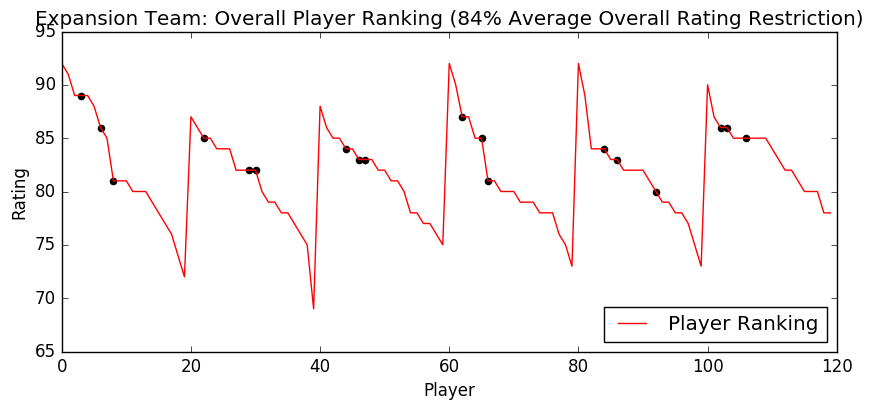

In [7]:
#PART B
#COMPOSITION OF TEAM IF WE ARE RESTRICTED TO AN AVERAGE OVERALL RATING OF 84 OR LOWER

using PyPlot
PyPlot.svg(true)


xx = 1:120
figure(figsize=(10,4))
plot(overall,"-", color = "red");
scatter([xx[3],xx[6],xx[8],xx[22],xx[29],xx[30],xx[44],xx[46],xx[47],xx[62],xx[65],xx[66],xx[84],xx[86],
xx[92],xx[102],xx[103],xx[106]],[overall[4],overall[7],overall[9],overall[23],overall[30],overall[31],
overall[45],overall[47],overall[48],overall[63],overall[66],overall[67],overall[85],overall[87],overall[93],
overall[103],overall[104],overall[107]], label="Our Players", color = "black")
axis([0,120,65,95])

legend(["Player Ranking" ], loc="lower right");
title("Expansion Team: Overall Player Ranking (84% Average Overall Rating Restriction)");
ylabel("Rating")
xlabel("Player")
println()
println("Player","           ","Overall", " ", "Team"," ", "Position","  ","Shot"," ","   ","Hands","   ", "Salary")
for i in 1:120
    if getvalue(x[i]) == 1
        println(player[i]," ",overall[i],"    ",team[i],"    ", position[i],"      ",shot[i]
        ,"       ",hands[i],"      " ,salary[i])
    end
end
@expression(m3, salaryhit, sum{x[i]*salary[i], i in 1:120})
@expression(m3, avg, (sum{x[i]*overall[i], i in 1:120})/18)
println()
println("The total score for the team: ", getobjectivevalue(m3))
println("The average overall rating with the 84% ceiling is: ",getvalue(avg))
println("The total salary hit is: ", getvalue(salaryhit))

For this part of the model, we wanted to see what would happen to our team if a rule was imposed that dictated that our team could not be any better than the 3rd quartile of our division. The situation is modeled here. As you can see, our points on the plot drop lower than they were before, and the average of drops to 84%. We have to sacrfice talent from every team, but our peak talent doesn't drop very substantially. 

To plot this, we un-commented the constraint that makes forces our choices to be less than the 84%

In [8]:
#PART C

#TRADEOFF ANALYSIS FOR EMPHASIS ON OVERALL RATING
#team selection when hands rating is normal vs. hands rating is 100x
xx = 1:120
figure(figsize=(10,4))
plot([1:120],[overall],"-", color = "red");

#players at normal overall rating weight
scatter([xx[2],xx[3],xx[4],xx[22],xx[23],xx[25],xx[44],xx[45],xx[47],xx[63],xx[64],xx[65],xx[83],xx[84],
xx[85],xx[103],xx[104],xx[107]],[overall[2],overall[3],overall[4],overall[22],overall[23],overall[25],overall[44],
overall[45],overall[47],overall[63],overall[64],overall[65],overall[83],overall[84],overall[85],overall[103],
overall[104],overall[107]], label="Players (Default)", color = "black")

#players at 100X
scatter([xx[1],xx[4],xx[7],xx[22],xx[26],xx[27],xx[43],xx[47],xx[48],xx[63],xx[64],xx[73],xx[81],
xx[84],xx[86],xx[103],xx[104],xx[107]],[overall[1],overall[4],overall[7],overall[22],overall[26],overall[27],
overall[43],overall[47],overall[48], overall[63],overall[64],overall[73],overall[81],overall[84],overall[86],
overall[103],overall[104],overall[107]],label="Players (Hands Emphasis)", color = "blue")

axis([0,120,65,95])

legend(loc="lower right");
title("Expansion Team: Overall Player Ranking");
ylabel("Rating")
xlabel("Player")

println()
println("Player","           ","Overall", " ", "Team"," ", "Position","  ","Shot"," ","   ","Hands","   ", "Salary")
for i in 1:120
    if getvalue(x[i]) == 1
        println(player[i]," ",overall[i],"    ",team[i],"    ", position[i],"      ",shot[i],"       ",
        hands[i],"      " ,salary[i])
    end
end
@expression(m3, salaryhit, sum{x[i]*salary[i], i in 1:120})
@expression(m3, avg, (sum{x[i]*overall[i], i in 1:120})/18)
println()
println()
println("The total score for the team: ", getobjectivevalue(m3))
println("The average overall rating with a hands emphasis is: ",getvalue(avg))
println("The total salary hit is: ", getvalue(salaryhit))


Player           Overall Team Position  Shot    Hands   Salary
Keith, D.       91    1    2      84       91      1620
Seabrook, B.    89    1    2      82       84      1580
Hossa, M.       89    1    3      87       89      1660
Stastny, P.     86    2    3      85       88      1550
Landeskog, G.   85    2    3      86       86      1590
O'Reilly, R.    84    2    3      85       84      1540
Daley, T.       85    3    2      80       82      1470
Cole, E.        84    3    3      85       84      1520
Goligoski, A.   83    3    2      84       88      1490
Koivu, M.       87    4    3      86       88      1610
Pominville, J.  87    4    3      87       88      1570
Backstrom, N.   85    4    1      87       84      1600
Fisher, M.      84    5    3      84       84      1520
Legwand, D.     84    5    3      85       85      1540
Wilson, C.      84    5    3      86       85      1560
Bouwmeester, J. 86    6    2      82       86      1570
Shattenkirk, K. 86    6    2      83    

This chart places an emphasis on the hands (by multiplying the hands parameter in the objective function by 100) Something to notice is that our team's overall rating did not go down by much (the black dots represent the solution we obtained in the optimal model). For us, this means that choosing players based on their hands (basically how well a player handles the puck) would be a good strategy for choosing an overall team. With that being said, our salary hit is only reduced by 110, meaning that it's still going to cost us money to field a solid team based on hands.

The emphasis we place on hands applies to our team and all of the other teams. For our analysis, we are planning if we can build a successful team and play THE FOLLOWING SEASON. We may decide that it is better for us to enter the league the next year, with the teams potentially having different players. By having the other teams protect the players with the best hands, we are essentially finding out the best case scenario if a team decides to protect the best players with the best hands. 


Player           Overall Team Position  Checking    Hands   Salary
Keith, D.       91    1    2       81         91       1620
Seabrook, B.    89    1    2       89         84       1580
Hossa, M.       89    1    3       85         89       1660
Stastny, P.     86    2    3       82         88       1550
Landeskog, G.   85    2    3       87         86       1590
O'Reilly, R.    84    2    3       85         84       1540
Daley, T.       85    3    2       86         82       1470
Cole, E.        84    3    3       86         84       1520
Goligoski, A.   83    3    2       80         88       1490
Koivu, M.       87    4    3       86         88       1610
Pominville, J.  87    4    3       81         88       1570
Backstrom, N.   85    4    1       87         84       1600
Fisher, M.      84    5    3       85         84       1520
Legwand, D.     84    5    3       83         85       1540
Wilson, C.      84    5    3       86         85       1560
Bouwmeester, J. 86    6    2    

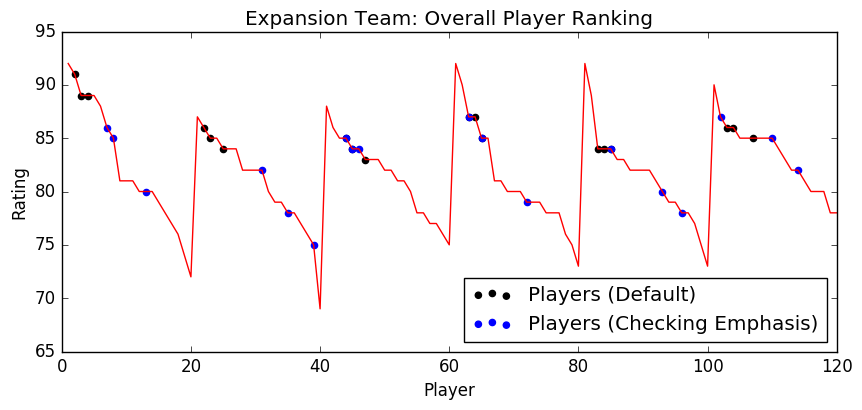

In [9]:
#PART D

#TRADEOFF ANALYSIS FOR EMPHASIS ON OVERALL RATING
#team selection when checking rating is normal vs. checking rating is 100x
xx = 1:120
figure(figsize=(10,4))
plot([1:120],[overall],"-", color = "red");

#players at normal overall rating weight
scatter([xx[2],xx[3],xx[4],xx[22],xx[23],xx[25],xx[44],xx[45],xx[47],xx[63],xx[64],xx[65],xx[83],xx[84],
xx[85],xx[103],xx[104],xx[107]],[overall[2],overall[3],overall[4],overall[22],overall[23],overall[25],
overall[44],overall[45],
overall[47],overall[63],overall[64],overall[65],overall[83],overall[84],overall[85],overall[103],overall[104],
overall[107]], label="Players (Default)", color = "black")

#players at 100X
scatter([xx[7],xx[8],xx[13],xx[31],xx[35],xx[39],xx[44],xx[45],xx[46],xx[63],xx[65],xx[72],xx[85],
xx[93],xx[96],xx[102],xx[110],xx[114]],[overall[7],overall[8],overall[13],overall[31],overall[35],
overall[39],overall[44],overall[45],overall[46],overall[63],overall[65],overall[72],overall[85],overall[93],
overall[96],overall[102],overall[110],overall[114]],label="Players (Checking Emphasis)", color = "blue")

axis([0,120,65,95])
legend(loc="lower right");
title("Expansion Team: Overall Player Ranking");
ylabel("Rating")
xlabel("Player")

println()
println("Player","           ","Overall", " ", "Team"," ", "Position","  ","Checking"," ","   ","Hands","   ", "Salary")
for i in 1:120
    if getvalue(x[i]) == 1
        println(player[i]," ",overall[i],"    ",team[i],"    ", position[i],"       ",checking[i],"         ",
        hands[i],"       " ,salary[i])
    end
end
@expression(m3, salaryhit, sum{x[i]*salary[i], i in 1:120})
println()
println()
println("The total score for the team: ", getobjectivevalue(m3))
@expression(m3, avg, (sum{x[i]*overall[i], i in 1:120})/18)
println("The average overall rating with a checking emphasis is: ",getvalue(avg))
println("The total salary hit is: ", getvalue(salaryhit))

The above chart shows the players we would choose if we wanted the best checking team (by multiplying the checking parameter in the objective function by 100). The overall rating goes down significantly, indicating that choosing based on checking would not lead to us getting a team with a high overall rating. The top line talent of our forwards (3) drops down the most siginificantly compared to our optimal model. Checking, however, would make a sizeable impact on our salary cap hit. That could free up money on an extra draft pick.  


Player           Overall Team Position  Shot    Hands   Salary
Keith, D.       91    1    2      84       91      1620
Seabrook, B.    89    1    2      82       84      1580
Hossa, M.       89    1    3      87       89      1660
Stastny, P.     86    2    3      85       88      1550
Landeskog, G.   85    2    3      86       86      1590
O'Reilly, R.    84    2    3      85       84      1540
Daley, T.       85    3    2      80       82      1470
Cole, E.        84    3    3      85       84      1520
Goligoski, A.   83    3    2      84       88      1490
Koivu, M.       87    4    3      86       88      1610
Pominville, J.  87    4    3      87       88      1570
Backstrom, N.   85    4    1      87       84      1600
Fisher, M.      84    5    3      84       84      1520
Legwand, D.     84    5    3      85       85      1540
Wilson, C.      84    5    3      86       85      1560
Bouwmeester, J. 86    6    2      82       86      1570
Shattenkirk, K. 86    6    2      83    

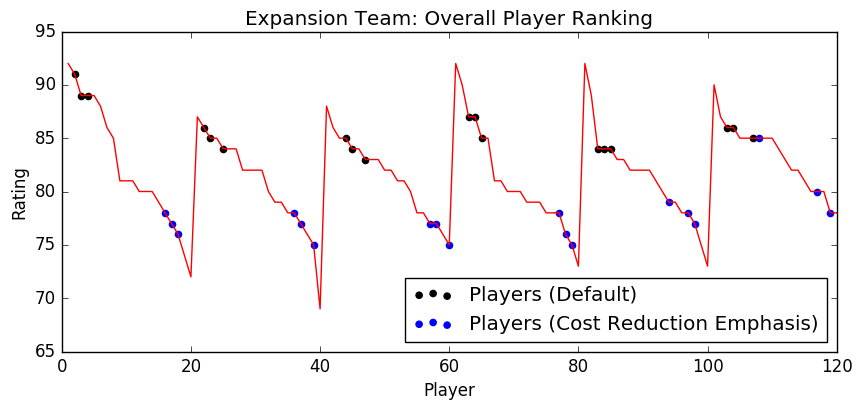

In [10]:
#PART E

##TRADEOFF ANALYSIS FOR EMPHASIS ON OVERALL RATING
#team selection when salary is a negative in the objective function, aka we want the cheapest team possible
xx = 1:120
figure(figsize=(10,4))
plot([1:120],[overall],"-", color = "red");

#players at normal salary weight
scatter([xx[2],xx[3],xx[4],xx[22],xx[23],xx[25],xx[44],xx[45],xx[47],xx[63],xx[64],xx[65],xx[83],xx[84],
xx[85],xx[103],xx[104],xx[107]],[overall[2],overall[3],overall[4],overall[22],overall[23],overall[25],
overall[44],overall[45],overall[47],overall[63],overall[64],overall[65],overall[83],overall[84],overall[85],
overall[103],overall[104],overall[107]], label="Players (Default)", color = "black")

#players at 100X salary weight
scatter([xx[16],xx[17],xx[18],xx[36],xx[37],xx[39],xx[57],xx[58],xx[60],xx[77],xx[78],xx[79],xx[94],
xx[97],xx[98],xx[108],xx[117],xx[119]],[overall[16],overall[17],overall[18],overall[36],overall[37],overall[39],
overall[57],overall[58],overall[60],overall[77],overall[78],
overall[79],overall[94],overall[97],overall[98],overall[108],overall[117],overall[119]], 
label="Players (Cost Reduction Emphasis)", color = "blue")

axis([0,120,65,95])

legend(loc="lower right");
title("Expansion Team: Overall Player Ranking");
ylabel("Rating")
xlabel("Player")

println()
println("Player","           ","Overall", " ", "Team"," ", "Position","  ","Shot"," ","   ","Hands","   ", "Salary")
for i in 1:120
    if getvalue(x[i]) == 1
        println(player[i]," ",overall[i],"    ",team[i],"    ", position[i],"      ",shot[i],
        "       ",hands[i],"      " ,salary[i])
    end
end
@expression(m3, salaryhit, sum{x[i]*salary[i], i in 1:120})
println()
println()
println("The total score for the team: ", getobjectivevalue(m3))
@expression(m3, avg, (sum{x[i]*overall[i], i in 1:120})/18)
println("The average overall rating with a cost savings emphasis: ",getvalue(avg))
println("The total salary hit is: ", getvalue(salaryhit))

This chart shows how much our optimal solution would change if our biggest concern was saving cost (by including a subtraction of the salary parameter in the objective function). Based on the chart, there is a large drop off in talent at lower salaries. This is an obvious outcome, but it looks like that there is isn't a large difference in overall talent between some of the lowest paid players. This means that we should be very selective on talents for our best overall players, and we can spend the rest of our salary less selectively on the lower overall guys. 

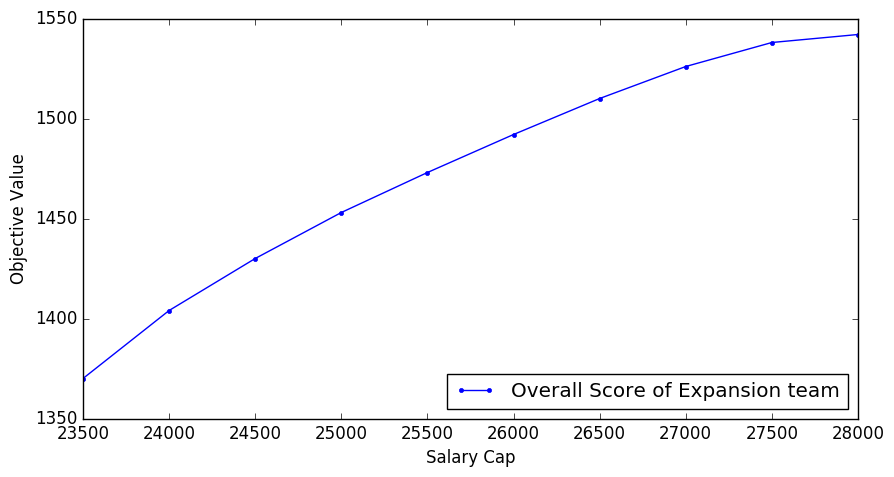

In [12]:
#PART F

#TRADEOFF ANALYSIS FOR SALARY CAP

cap = [28000, 27500, 27000, 26500, 26000, 25500, 25000, 24500, 24000, 23500 ]
# sum of overall values for expansion team when objective function is only based on 
# the overall value and the salary cap is decreasing by 500, starting at 
# 28000 down to 23500. It is infeasible at 23000. 
totovr = [1542, 1538, 1526 , 1510, 1492, 1473, 1453, 1430, 1404, 1370 ]

using PyPlot
PyPlot.svg(true)

figure(figsize=(10,5))
plot([cap],[totovr],".-");
legend(["Overall Score of Expansion team", "Salary Cap"], loc="lower right");
ylabel("Objective Value")
xlabel("Salary Cap")
;

This is a tradeoff curve between salary and our objective value (without any the 84% limit or any emphasis on attributes. Based on this graph, there is decreasingly marginal return on the overall objective value. At around 28,000 salary, our overall objective function value levels off for increasing salary spending. For us this means that we should not try to spend over 28,000 on the team, because we won't necessarily get any better and we will have less money to spend on the incoming rookies. When we run our model choosing solely on overall rankings, we are spending 28,180. This is good given the above analysis. 

## 5. Conclusion ##

In this project we were able to create a model that we believe accurately portrays what an expansion draft could look like based on the needs of an expansion team and desires of the existing teams. It is important to note that something we could not take into account are the "intangibles" that some players possess. These "intangibles" are charactersistics such as producing in clutch situations and enhancing chemistry in the locker room. We were able to portray many other player attributes that scouts use to assess players skills, though. We found that the available salary plays an essential role in the ability to create the best team possible. This project could be used to see how accurately it can predict the decisions of a potential future NHL expansion in the coming years. It would need to be expanded to inclue all teams and have updated player information as they change greatly from year to year but overall the idea will be the same. Another follow up project could be using the same concepts displayed to model the actual NHL draft. The first portion involving who is kept could be eliminated as all the players are incoming Rookies and are free agents but the prioritizing concept of the drafting portion would be applicable. There could be constraints added that involve the current players on each team in order to account for their needs because they may not want to draft a goalie if they already have two highly rated ones. Overall there are multiple ways portions of this model could lead to future projects that are very relevant to the NHL. This project was very interesting to do because of our interest in the NHL and the desire to think in a similar manner as GM's and Coaches in the NHL. It was an enjoyable and rewarding experience once we were able to create a model we believed accurately depicted what the real life situation would look like. 